<a href="https://colab.research.google.com/github/GuilhermeRoxo94/Analise-exploratoria-da-exportacao-de-uma-vinicola/blob/main/Exporta%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Quais países são os principais destinos das exportações de vinhos nos últimos anos?

In [1]:
print('hello world')

hello world


### Importando as Bibliotecas

In [2]:
#manipulação dos dados
import pandas as pd
import numpy as np

#visualização dos dados
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### Subindo a base de dados para o colab

In [3]:
df_exportacao = pd.read_csv('Exportacao (1).csv', sep=';')

### Exploração

In [4]:
df_exportacao.dtypes

,0
Id,int64
País,object
1970,int64
1970.1,int64
1971,int64
...,...
2021.1,int64
2022,int64
2022.1,int64
2023,int64


In [5]:
df_exportacao.shape

(137, 110)

In [6]:
df_exportacao.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,0,0,11,46,0,0,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,26,95,4,21,0,0,0,0,117,698
2,3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,...,3660,25467,6261,32605,2698,6741,7630,45367,4806,31853
3,4,Angola,0,0,0,0,0,0,0,0,...,345,1065,0,0,0,0,4068,4761,0,0
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_exportacao.tail()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1
132,133,Tuvalu,0,0,0,0,0,0,0,0,...,0,0,2,4,0,0,0,0,0,0
133,134,Uruguai,0,0,0,0,0,0,0,0,...,6180,18497,0,0,136774,149842,637117,997367,326093,454271
134,135,Vanuatu,0,0,0,0,0,0,0,0,...,0,0,18,31,0,0,0,0,0,0
135,136,Venezuela,0,0,3200,2000,1350,750,11700,6458,...,0,0,4086,9808,26415,35944,23220,32351,141030,220512
136,137,Vietnã,0,0,0,0,0,0,0,0,...,20,32,86,584,0,0,130,277,72,128


### Verificação de valores nulos




In [8]:
print(f'Quantidade de valores nulos: {df_exportacao.isnull().sum().sum()}')

Quantidade de valores nulos: 0


### Transformando a estrutura larga em longa (tidy data)

### Separando colunas

In [9]:
colunas = df_exportacao.columns.drop(['Id','País'])

In [10]:
coluna_litros = [c for c in colunas if '.' not in str(c)]
coluna_valor = [c for c in colunas if '.' in str(c)]

In [11]:
print(f'Litros: {coluna_litros}')
print(f'Valor: {coluna_valor}')

Litros: ['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
Valor: ['1970.1', '1971.1', '1972.1', '1973.1', '1974.1', '1975.1', '1976.1', '1977.1', '1978.1', '1979.1', '1980.1', '1981.1', '1982.1', '1983.1', '1984.1', '1985.1', '1986.1', '1987.1', '1988.1', '1989.1', '1990.1', '1991.1', '1992.1', '1993.1', '1994.1', '1995.1', '1996.1', '1997.1', '1998.1', '1999.1', '2000.1', '2001.1', '2002.1', '2003.1', '2004.1', '2005.1', '2006.1', '2007.1', '2008.1', '2009.1', '2010.1', '2011.1', '2012.1', '2013.1', '2014.1', '2015.1', '2016.1', '2017.1', '2018.1', '2019.1', '2020.1', '2021.1', '2022.1', '2023.1']


### Transformando o dataframe para formato longo

In [12]:
#converte colunas de litros
df_litros = df_exportacao.melt(id_vars=['País'], value_vars=coluna_litros,
                    var_name='Ano', value_name='Litros')

In [13]:
#converte colunas de valores
df_valor = df_exportacao.melt(id_vars=['País'], value_vars=coluna_valor,
                    var_name='Ano', value_name='valor')

In [14]:
#ajusta o ano (remove o .1)
df_valor['Ano'] = df_valor['Ano'].astype(str).str.replace('.1','', regex=False)

In [15]:
#junta os dois dataframe
df_final = pd.merge(df_litros, df_valor, on=['País', 'Ano'])
df_final['Ano'] = df_final['Ano'].astype(int)

In [16]:
df_final.head(138)

,País,Ano,Litros,valor
0,Afeganistão,1970,0,0
1,África do Sul,1970,0,0
2,"Alemanha, República Democrática",1970,0,0
3,Angola,1970,0,0
4,Anguilla,1970,0,0
...,...,...,...,...
133,Uruguai,1970,0,0
134,Vanuatu,1970,0,0
135,Venezuela,1970,0,0
136,Vietnã,1970,0,0


### Analise Exploratoria

#### Gráfico 1

In [26]:
top_paises = (df_final[df_final['Ano'] >= 2019]
               .groupby('País')[['Litros', 'valor']]
               .sum()
               .sort_values('valor', ascending=False)
               .head(10))

In [27]:
top_paises

,Litros,valor
País,,
Paraguai,21098125,27561748
Haiti,2264528,3044811
Estados Unidos,1071240,2307605
Uruguai,1106164,1619977
China,493301,1591687
Reino Unido,112685,592409
Rússia,249440,440094
Japão,176820,422579
Venezuela,194751,298615


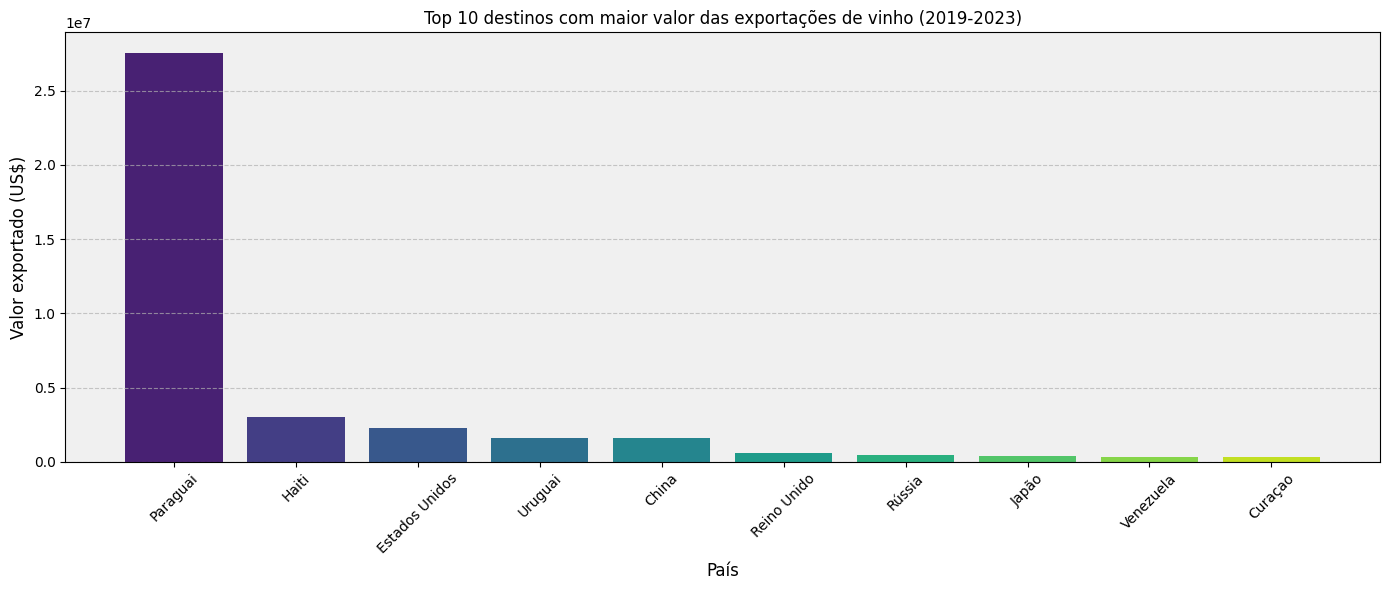

In [28]:
#criação do gráfico
plt.figure(figsize=(14,6))
cores = sns.color_palette("viridis", len(top_paises))
plt.bar(top_paises.index, top_paises['valor'], color = cores)

#personalização do gráfico
plt.title('Top 10 destinos com maior valor das exportações de vinho (2019-2023)', fontsize = 12)
plt.xlabel('País', fontsize = 12)
plt.ylabel('Valor exportado (US$)', fontsize = 12)
plt.style.use('default') # garante que o estilo base esteja limpo
plt.gca().set_facecolor('#f0f0f0') # define o fundo do gráfico como cinza claro
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.xticks(rotation=45)
plt.tight_layout()

#exibição do gráfico
plt.show()


Interpretação gráfico 1

Neste gráfico de barras podemos ver os 10 países com maior valor das exportações de vinhos nos últimos 5 anos, disparadamente o paraguai ocupa a primeira posição, podemos ver que temos as 2 maiores potencias do mundo no top5 EUA e China, uma menção honrosa a venezuela que mesmo com a crise política ocupa a 9 posição

#### Gráfico 2

In [29]:
#filtrar apenas os anos de 2010 a 2019
df_decada = df_final [(df_final['Ano'] >= 2010) & (df_final['Ano'] <= 2019)]

#agrupar por país e somar litros e valor em dólar
top_paises_decada = (df_decada
                     .groupby('País')[['Litros', 'valor']]
                     .sum()
                     .sort_values('valor', ascending = False)
                     .head(10)
)

In [30]:
top_paises_decada

,Litros,valor
País,,
Paraguai,11637732,18734958
Rússia,10659787,16979342
Estados Unidos,2115505,6957654
Reino Unido,1042298,4144330
Espanha,1987849,3797542
China,657821,3206436
Países Baixos,713015,2823729
Japão,618168,1650790
"Alemanha, República Democrática",401634,1638229


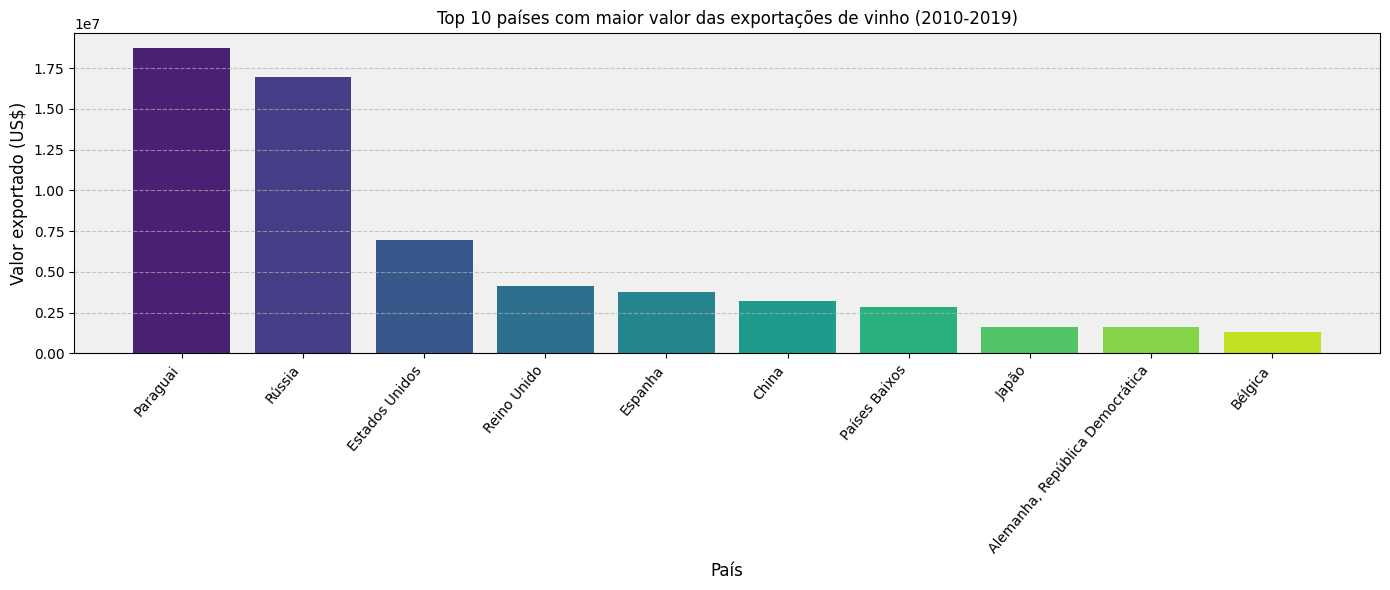

In [32]:
#criação do gráfico
plt.figure(figsize=(14,6))
cores = sns.color_palette("viridis", len(top_paises))
plt.bar(top_paises_decada.index, top_paises_decada['valor'], color = cores)

#personalização do gráfico
plt.title('Top 10 países com maior valor das exportações de vinho (2010-2019)', fontsize = 12)
plt.xlabel('País', fontsize = 12)
plt.ylabel('Valor exportado (US$)', fontsize = 12)
plt.style.use('default') # garante que o estilo base esteja limpo
plt.gca().set_facecolor('#f0f0f0') # define o fundo do gráfico como cinza claro
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.xticks(rotation=50, ha='right')
plt.tight_layout() #ajusta automaticamente os espaços



#exibição do gráfico
plt.show()

Interpretação gráfico 2

Aqui temos um gráfico de barras e podemos ver os 10 países com maior valor das exportações de vinhos nos anos de 2010-2019, o Paraguai lidera a lista de maneira surpreendente seguido pela Rússia e só depois podemos ver uma das maiores potencias em 3 lugar EUA, a China só ocupa a 6 posição, temos 6 países europeus o que chama atenção já que o restante que sobra são potencias e apenas um país da América do sul.

#### Gráfico 3

In [33]:
#filtrar dados apenas de 2000 a 2010
df_decada_passada = df_final [(df_final['Ano'] >= 2000) & (df_final['Ano'] <= 2010)]

#agrupar por país e somar litros e valor em dólar
top_paises_decada_passada = (df_decada_passada
                     .groupby('País')[['Litros', 'valor']]
                     .sum()
                     .sort_values('valor', ascending = False)
                     .head(10)
)

In [34]:
top_paises_decada_passada

,Litros,valor
País,,
Paraguai,21070189,10130300
Rússia,28898772,8494940
Estados Unidos,2391797,4331663
Japão,3239295,2214840
Países Baixos,816307,1641398
"Alemanha, República Democrática",759992,1455646
Angola,497006,897749
Suíça,277044,793341
Reino Unido,382809,738849


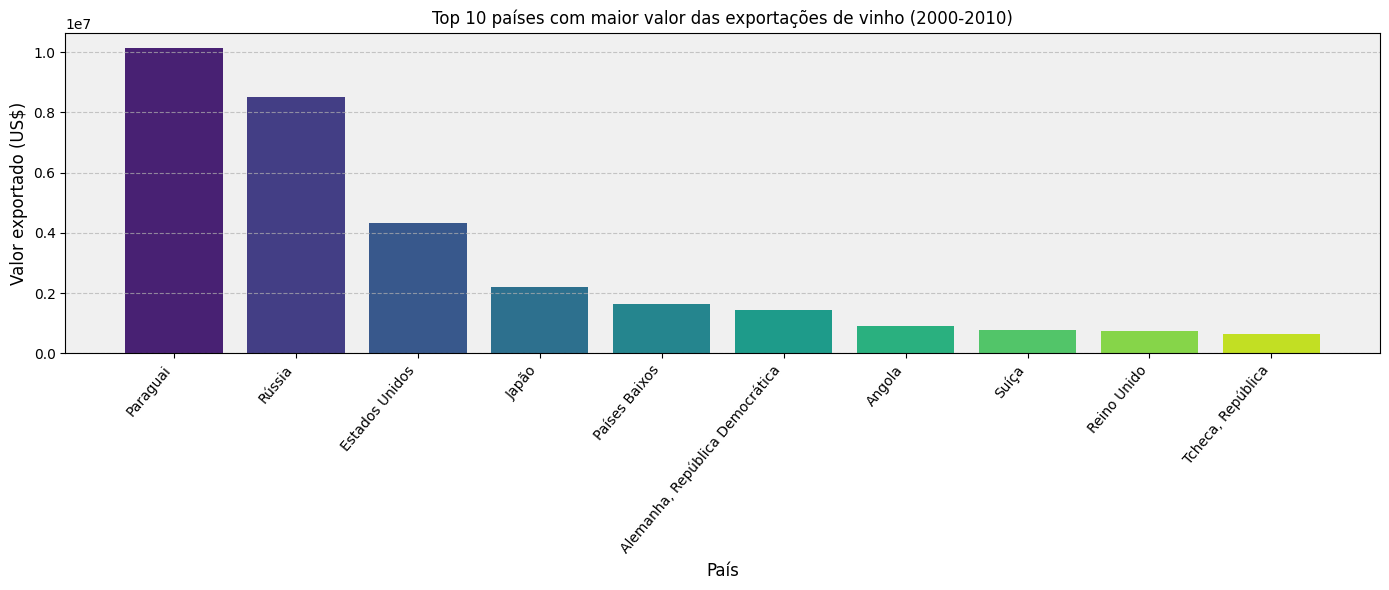

In [35]:
#criação do gráfico
plt.figure(figsize=(14,6))
cores = sns.color_palette("viridis", len(top_paises))
plt.bar(top_paises_decada_passada.index, top_paises_decada_passada['valor'], color = cores)

#personalização do gráfico
plt.title('Top 10 países com maior valor das exportações de vinho (2000-2010)', fontsize = 12)
plt.xlabel('País', fontsize = 12)
plt.ylabel('Valor exportado (US$)', fontsize = 12)
plt.style.use('default') # garante que o estilo base esteja limpo
plt.gca().set_facecolor('#f0f0f0') # define o fundo do gráfico como cinza claro
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.xticks(rotation=50, ha='right')
plt.tight_layout() #ajusta automaticamente os espaços

#exibição do gráfico
plt.show()

Interpretação do gráfico 3

Neste gráfico de barras podemos ver os 10 países com maior valor das exportações de vinho de 2000-2010, o gráfico vem sendo liderado pelo paraguai, seguido pela Rússia e com metade do valor exportado da Rússia os Eua em 3 lugar. Nesses anos de 2000-2010 não temos a china no top 10 mas pela primeira vez temos um país africano no top 10 ocupando a 7 posição.

#### Gráfico 4 de Tendência

In [36]:
tendencia = df_final.groupby('Ano')['valor'].sum().reset_index()

In [37]:
tendencia

,Ano,valor
0,1970,40500
1,1971,83465
2,1972,121097
3,1973,174792
4,1974,185871
5,1975,269581
6,1976,296169
7,1977,479276
8,1978,305419
9,1979,2805489


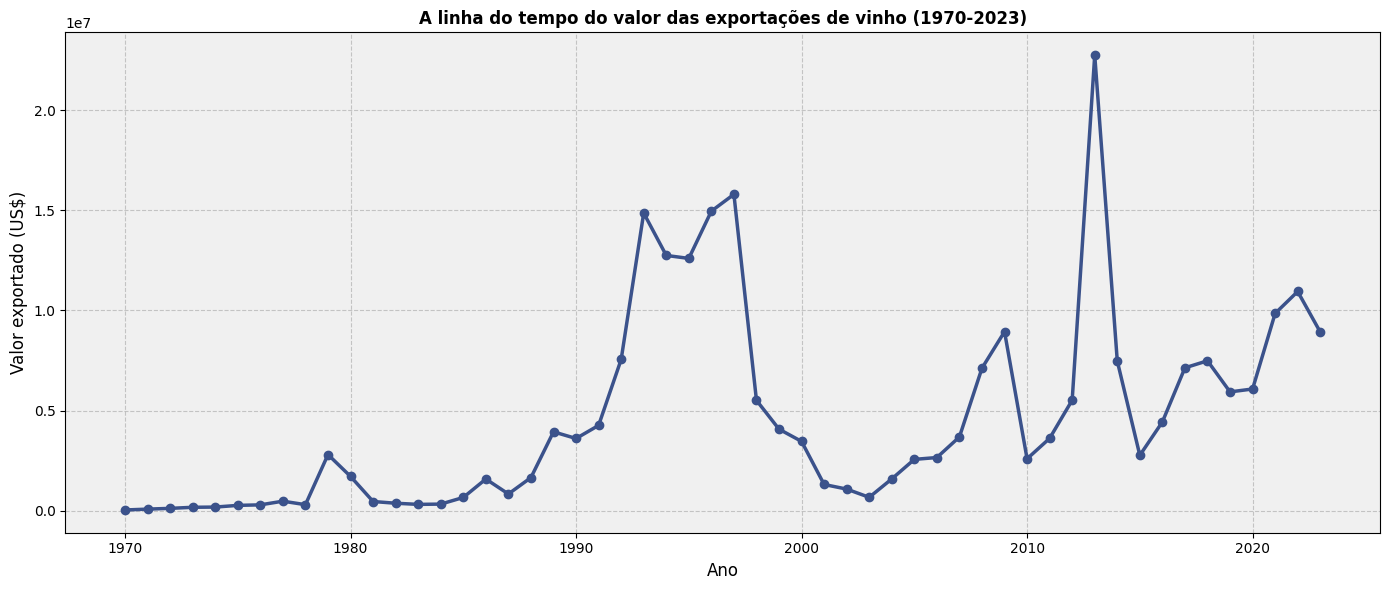

In [38]:
#criação do gráfico
plt.figure(figsize=(14,6))
plt.plot(tendencia['Ano'], tendencia['valor'], color='#3B528B', linewidth=2.5, marker='o')

# Personalização
plt.title('A linha do tempo do valor das exportações de vinho (1970-2023)', fontsize=12, weight='bold')
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Valor exportado (US$)', fontsize=12)
plt.style.use('default') # garante que o estilo base esteja limpo
plt.gca().set_facecolor('#f0f0f0') # define o fundo do gráfico como cinza claro
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()


# Exibir gráfico
plt.show()

Interpretação do gráfico de tendência 1970-2023

Tudo começou em 1970 mas só em 1979 teve um aumento considerado no valor das exportações e depois uma queda o que é normal para o começo de uma empresa. Em 1985 começou a crescente dos valores de exportação e de 1989 a 1991 estabilizou, um ano depois os valores subiram novamente e deu início aos 5 melhores anos seguidos que foi de 1993 a 1997, 6 anos depois em 2003 tivemos o pior ano desde 1978 mas logo após veio o segundo maior pico que foi em 2009 durando apenas 1 ano e teve uma queda brusca no ano de 2010, ano que foi um divisor de águas 3 anos depois em 2013 tivemos o melhor ano de valor exportado e depois uma queda normal e de 2016 até 2023 temos uma projeção de crescimento

#### Gráfico 5

In [41]:
#filtrar apenas os anos de 1990-2000
df_anos90 = df_final [(df_final['Ano'] >= 1990) & (df_final['Ano'] <= 2000)]

#agrupar por países e somar litros e valor em dólar
top_paises_90 = (df_anos90
                 .groupby('País')[['Litros', 'valor']]
                 .sum()
                 .sort_values('valor', ascending = False)
                 .head(10)
)

In [42]:
top_paises_90

,Litros,valor
País,,
Estados Unidos,44671125,54520040
Paraguai,60299978,34403808
Reino Unido,2014571,3289125
Japão,4887920,3275145
Finlândia,587970,1075874
Angola,348667,574527
Argentina,1024188,454040
Bolívia,559378,285448
Dinamarca,192473,284558


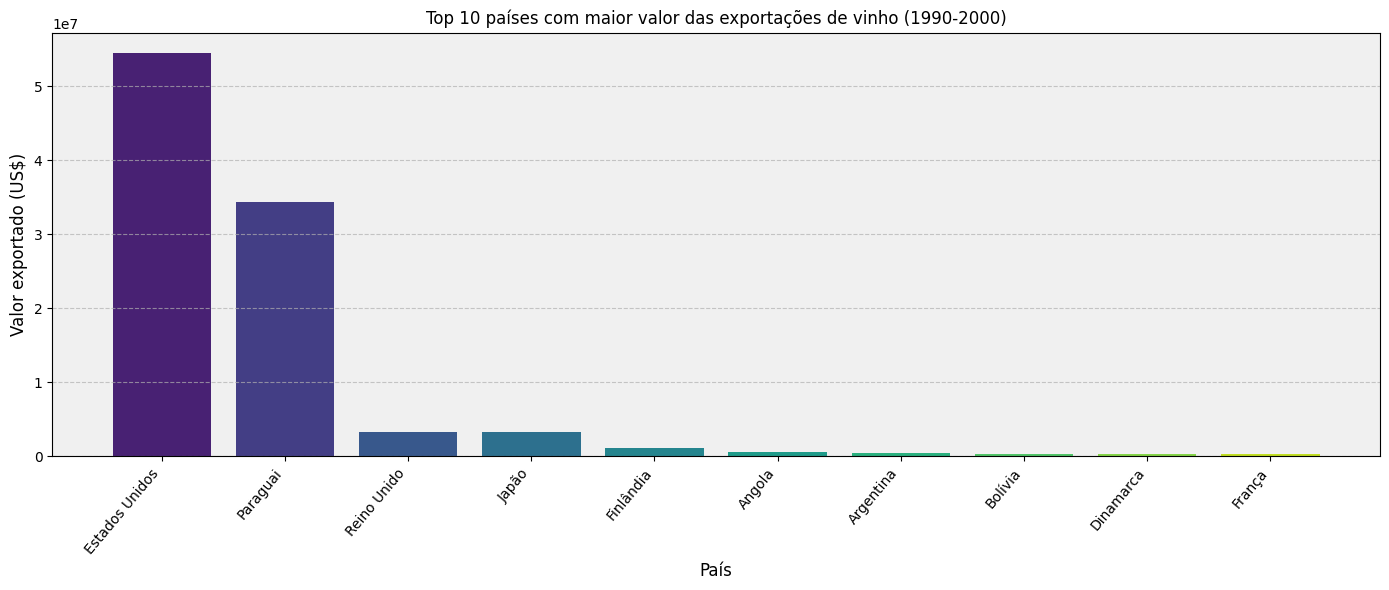

In [43]:
plt.figure(figsize=(14,6))
cores = sns.color_palette("viridis", len(top_paises))
plt.bar(top_paises_90.index, top_paises_90['valor'], color = cores)

#personalização do gráfico
plt.title('Top 10 países com maior valor das exportações de vinho (1990-2000)', fontsize = 12)
plt.xlabel('País', fontsize = 12)
plt.ylabel('Valor exportado (US$)', fontsize = 12)
plt.style.use('default') # garante que o estilo base esteja limpo
plt.gca().set_facecolor('#f0f0f0') # define o fundo do gráfico como cinza claro
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.xticks(rotation=50, ha='right')
plt.tight_layout() #ajusta automaticamente os espaços

#exibição do gráfico
plt.show()

Interpretação do gráfico 5

Nesse gráfico de barras temos os 10 países com maior valor das exportações de vinhos nos anos de 1990-2000, liderado pelos EUA logo atrás o Paraguai, uma grande surpresa, e no top 3 o Reino Unido quase empatado com o Japão, depois vemos 3 países europeus, 1 africano e 2 países sul-americanos.

#### Gráfico 6

In [44]:
#filtrar apenas os anos de 1979-1990
df_anos70 = df_final [(df_final['Ano'] >= 1979) & (df_final['Ano'] <= 1990)]

#agrupar
top_paises_70 = (df_anos70
                 .groupby('País')[['Litros', 'valor']]
                 .sum()
                 .sort_values('valor', ascending = False)
                 .head(10)
)

In [45]:
top_paises_70

,Litros,valor
País,,
Estados Unidos,7049143,7338681
Paraguai,10941170,6317428
Angola,5170027,3526487
Bolívia,306287,252808
Canadá,578608,161832
Dinamarca,105247,140848
Japão,119960,124805
Reino Unido,91134,123558
Barbados,46694,52558


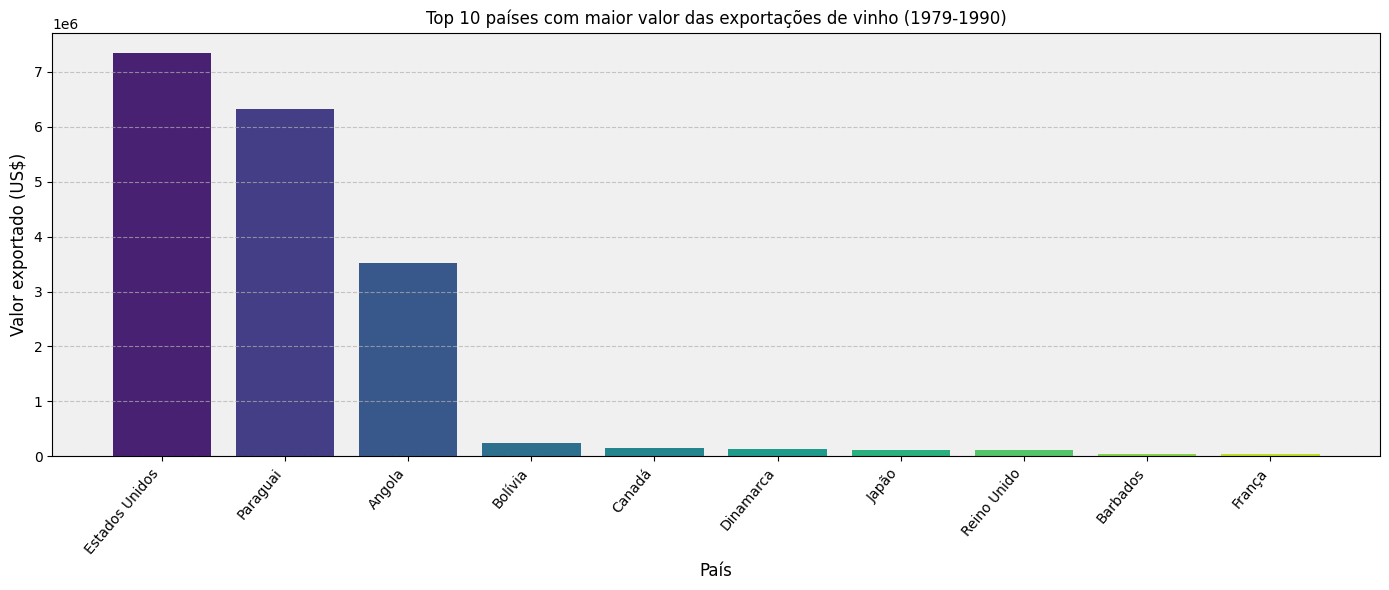

In [46]:
#criação do gráfico
plt.figure(figsize=(14,6))
cores = sns.color_palette("viridis", len(top_paises))
plt.bar(top_paises_70.index, top_paises_70['valor'], color = cores)

#personalização do gráfico
plt.title('Top 10 países com maior valor das exportações de vinho (1979-1990)', fontsize = 12)
plt.xlabel('País', fontsize = 12)
plt.ylabel('Valor exportado (US$)', fontsize = 12)
plt.style.use('default') # garante que o estilo base esteja limpo
plt.gca().set_facecolor('#f0f0f0') # define o fundo do gráfico como cinza claro
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.xticks(rotation=50, ha='right')
plt.tight_layout() #ajusta automaticamente os espaços

#exibição do gráfico
plt.show()

Interpretação Gráfico 6

Neste gráfico de barras temos os 10 países com maior valor das exportações de vinho de 1979-1990, a partir do fim da década de 70 o valor começou a subir e o gráfico vem sendo liderado pelos EUA seguido pelo Paraguai e fechando o top 3 a Angola, e pela primeia vez temos um país que é numa ilha, ilha do caribe, Barbados uma nação independente